# Predicting the likelihood of heart disease
This study looks at various demographic and health factors of the patients to predict whether the new patient will have heart diseases. The data are collected from multiple hospitals, anonymised. Identifying the risk factors can lead to healthier lifestyles and more attentive medical checkups and healthcare, preventing premature deaths.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
heart_disease = pd.read_csv('heart_disease_prediction.csv')

In [3]:
heart_disease

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Age: age of the patient [years]

Sex: sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: resting blood pressure [mm Hg]

Cholesterol: serum cholesterol [mm/dl]

FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

In [4]:
print('The number of features is {}'.format(heart_disease.shape[1]))

The number of features is 12


In [5]:
print('The number of observations is {}'.format(heart_disease.shape[0]))

The number of observations is 918


## Exploratory Data Analysis (EDA)

In [6]:
heart_disease.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
heart_disease.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The average age of the patients is 53.5. 

The resting blood pressure and cholesterol could not be zero, and resting blood pressure being 200 and cholesterol being 603 seem a bit too high.

There are no missing values.

<span style="color:orange">It needs attention that he median for Cholesterol is higher than its mean by roughly 25 mm/dl, indicating that it could be a left-skewed distribution with a possibility of outliers skewing the distribution.</span>


In [8]:
heart_disease.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There is no missing value.

In [9]:
%matplotlib inline

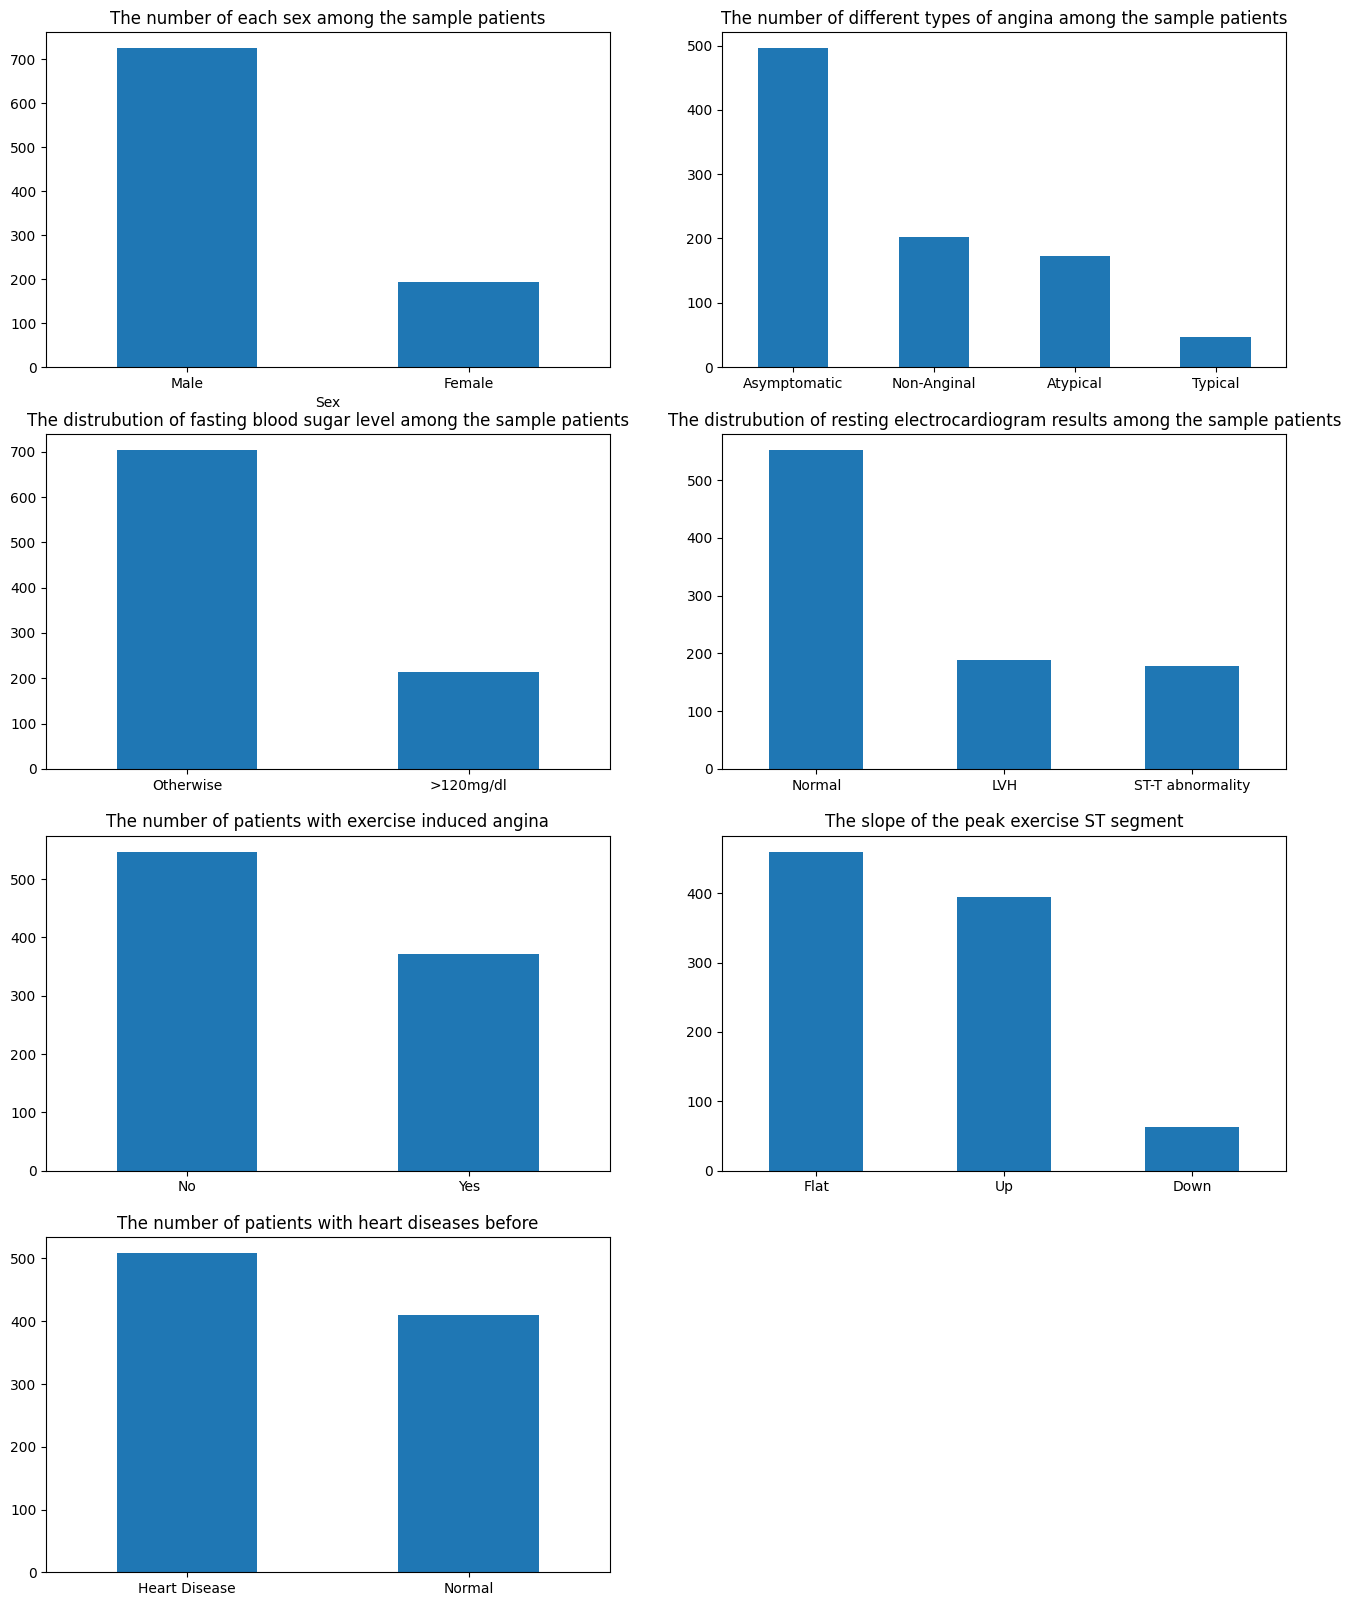

In [10]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(4, 2, figsize=(16, 20))


axs = axs.flatten()


heart_disease['Sex'].value_counts().plot.bar(ax=axs[0])
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['Male', 'Female'], rotation = 0)
axs[0].set_title('The number of each sex among the sample patients')


heart_disease['ChestPainType'].value_counts().plot.bar(ax=axs[1])
axs[1].set_xticks([0, 1, 2, 3])
axs[1].set_xticklabels(['Asymptomatic', 'Non-Anginal', 'Atypical', 'Typical'], rotation = 0)
axs[1].set_title('The number of different types of angina among the sample patients')


heart_disease['FastingBS'].value_counts().plot.bar(ax=axs[2])
axs[2].set_xticks([0, 1])
axs[2].set_xticklabels(['Otherwise', '>120mg/dl'], rotation = 0)
axs[2].set_title('The distrubution of fasting blood sugar level among the sample patients')


heart_disease['RestingECG'].value_counts().plot.bar(ax=axs[3])
axs[3].set_xticks([0, 1, 2])
axs[3].set_xticklabels(['Normal', 'LVH', 'ST-T abnormality'], rotation=0)
axs[3].set_title('The distrubution of resting electrocardiogram results among the sample patients')


heart_disease['ExerciseAngina'].value_counts().plot.bar(ax=axs[4])
axs[4].set_xticks([0, 1])
axs[4].set_xticklabels(['No', 'Yes'], rotation = 0)
axs[4].set_title('The number of patients with exercise induced angina')

heart_disease['ST_Slope'].value_counts().plot.bar(ax=axs[5])
axs[5].set_xticks([0, 1, 2])
axs[5].set_xticklabels(['Flat', 'Up', 'Down'], rotation = 0)
axs[5].set_title('The slope of the peak exercise ST segment')


heart_disease['HeartDisease'].value_counts().plot.bar(ax=axs[6])
axs[6].set_xticks([0, 1])
axs[6].set_xticklabels(['Heart Disease', 'Normal'], rotation = 0)
axs[6].set_title('The number of patients with heart diseases before')

axs[7].axis('off')
for i in range(1,7):
    axs[i].set_xlabel('')

plt.show()


The gender distribution of the patients is imbalanced: there are three times as many as male patients as female ones in the sample. Half of the patient experience asymptomatic (around three fourths), and most of them have normal blood sugar levels and electrocardiogram results (over half). Very few patients have a downward slope of ST segment, while falt and upwards slopes make up half of the rest of the cases separately. Slightly more than half of the patients had heart diseases before.

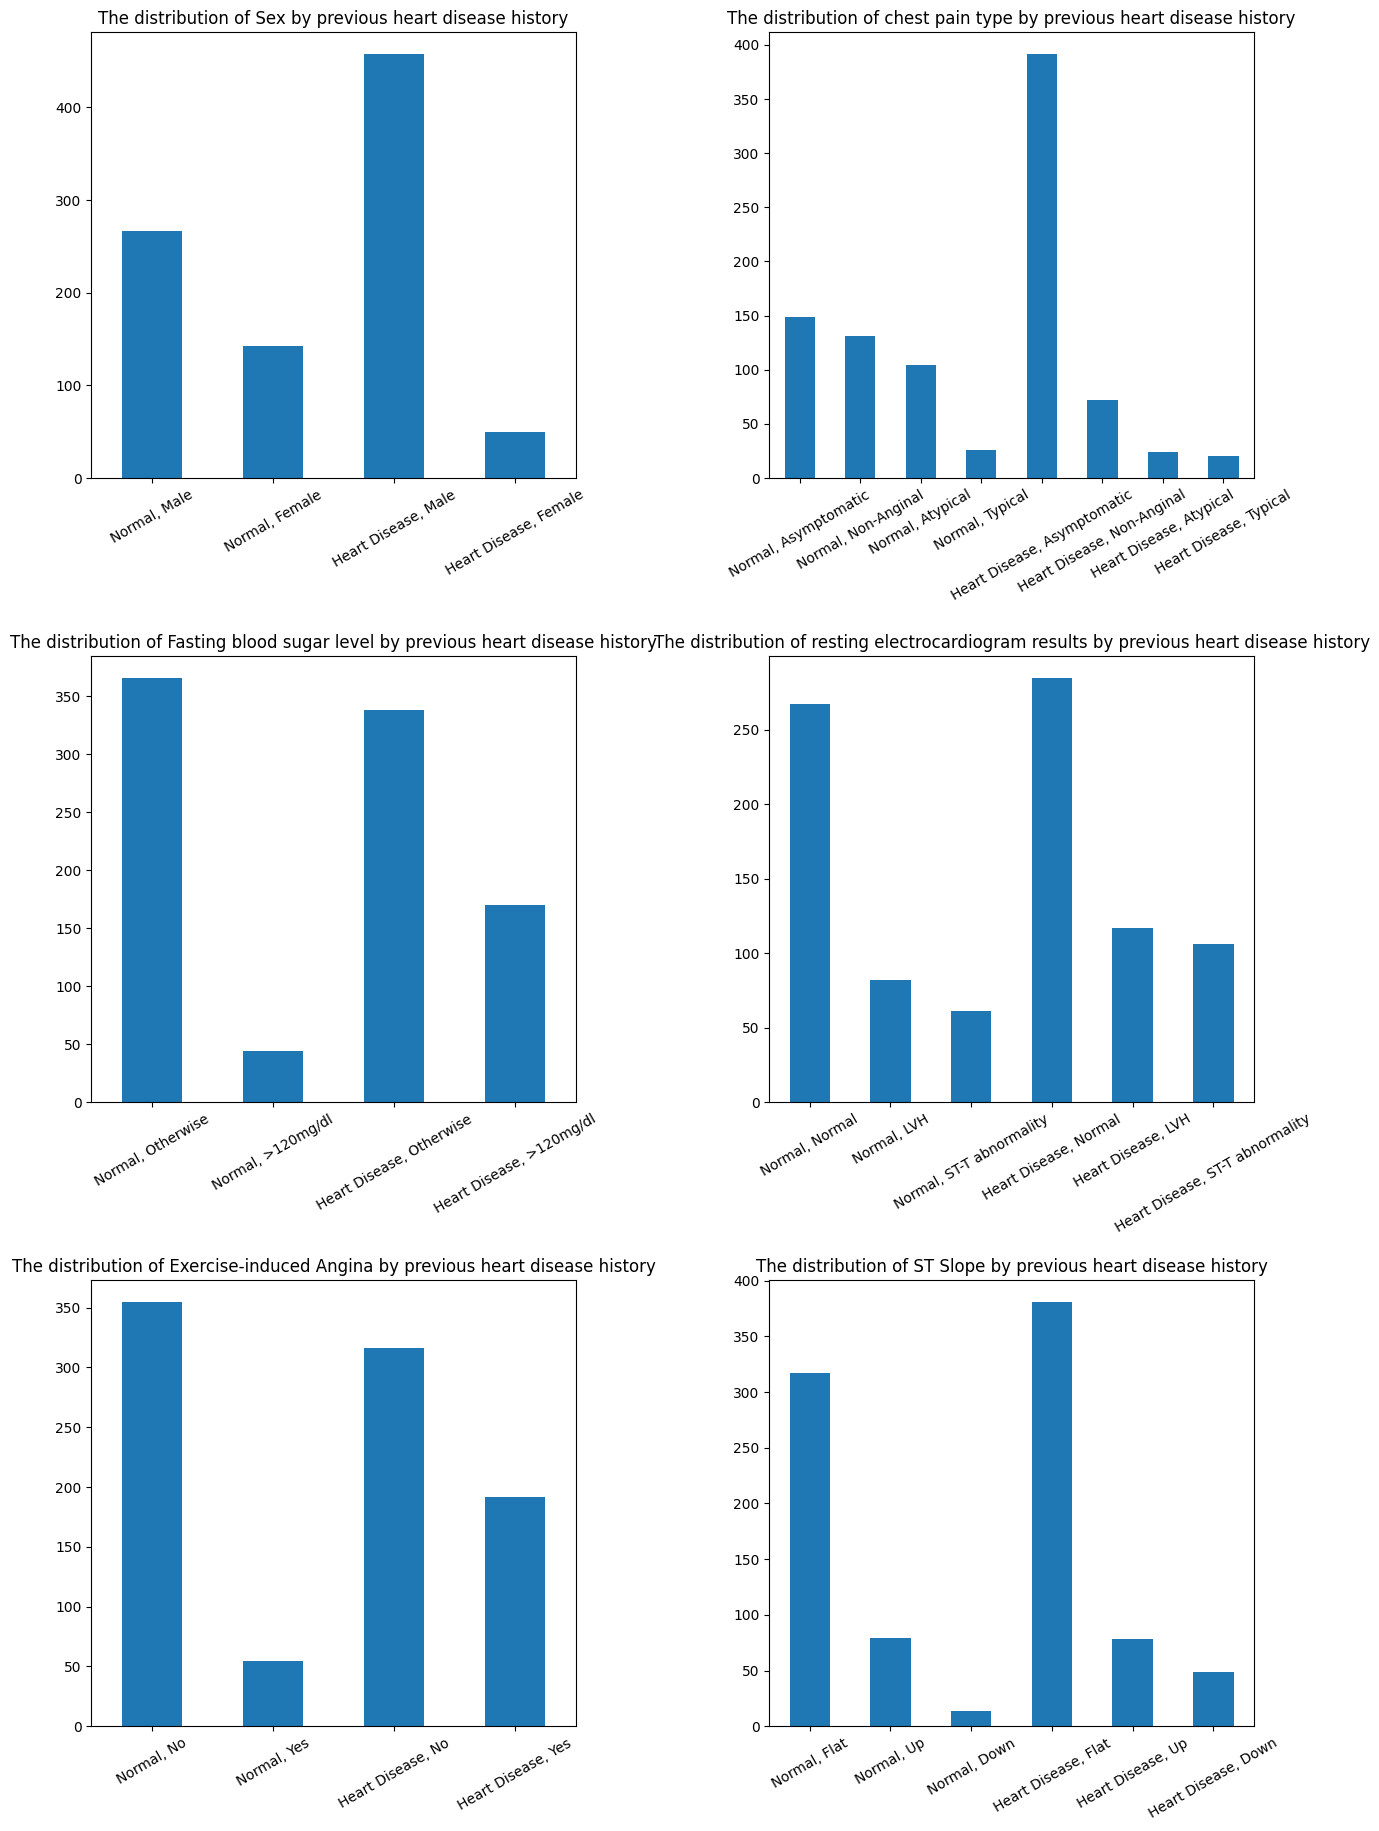

In [11]:
import matplotlib.pyplot as plt

column_names = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
column_names_print = ['Sex', 'chest pain type', 'Fasting blood sugar level', 'resting electrocardiogram results', 'Exercise-induced Angina', 'ST Slope']
fg, axs = plt.subplots(3, 2, figsize=(15,22))
axs = axs.flatten()
custom_labels_dict = {
    'Sex': ['Normal, Male', 'Normal, Female', 'Heart Disease, Male', 'Heart Disease, Female'],
    'ChestPainType': ['Normal, Asymptomatic', 'Normal, Non-Anginal', 'Normal, Atypical', 'Normal, Typical', 
                      'Heart Disease, Asymptomatic', 'Heart Disease, Non-Anginal', 'Heart Disease, Atypical', 'Heart Disease, Typical'],
    'FastingBS': ['Normal, Otherwise', 'Normal, >120mg/dl', 'Heart Disease, Otherwise', 'Heart Disease, >120mg/dl'],
    'RestingECG': ['Normal, Normal', 'Normal, LVH', 'Normal, ST-T abnormality', 
                   'Heart Disease, Normal', 'Heart Disease, LVH', 'Heart Disease, ST-T abnormality'],
    'ExerciseAngina': ['Normal, No', 'Normal, Yes', 'Heart Disease, No', 'Heart Disease, Yes'],
    'ST_Slope': ['Normal, Flat', 'Normal, Up', 'Normal, Down', 
                 'Heart Disease, Flat', 'Heart Disease, Up', 'Heart Disease, Down']
}

# This code is to make the array coordinate into a sigle number for indexing as an alternative to defining fig first and specifying plt.subplot(x,y,i) later. But the starting index becomes 0 instead of 1.
for i in range(0,6):
    heart_disease.groupby('HeartDisease')[column_names[i]].value_counts().plot.bar(ax = axs[i])    
    axs[i].set_title('The distribution of {} by previous heart disease history'.format(column_names_print[i]))
    axs[i].set_xlabel('')
    axs[i].set_xticks([k for k in range (0, len(axs[i].get_xticklabels()))])
    axs[i].set_xticklabels(custom_labels_dict[column_names[i]], rotation =30)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
 

For patients with heart disease, there are predominantly male patients with asymptomatic angina. A larger proportion of patients with heart disease have higher than normal sugar level in their blood, while, for the resting electrocardiogram results and ST slope, the presence of heart disease does not seem to make a significant difference. Patient with heart disease are likely to experience angina induced by exercise.

In [12]:
print("{}% of patients with heart disease are male and over 50 years old".
      format(round(len(heart_disease[(heart_disease['Sex'] == 'M') & 
                                     (heart_disease['Age'] > 50)])*100/len(heart_disease), 2)))

53.05% of patients with heart disease are male and over 50 years old


<span style="color:orange">The dataset is highly skewed towards male patients. 725 rows correspond to male patients, whereas only 193 correspond to female patients. This could potentially induce a bias in our model and impact predictions for any female patients in any unseen data.
    
<span style="color:crimson">410 patients were not diagnosed with heart disease, whereas 508 patients were. The target variable is somewhat evenly distributed, which is beneficial for training our model.
A significant number of patients, 392, diagnosed with heart disease have asymptomatic (ASY) chest pain. While chest pain could be a relevant feature for our model, it's should be noted that asymptomatic implies that those patients who had heart disease did not have chest pain as a symptom.
    
<span style="color:orange">A high number (170) of patients with blood sugar greater than 120 mg/dl were diagnosed with heart disease in relation to those who were not.
</span>


## Data Cleaning

In [13]:
# the number of rows that have a 0 value for RestingBP
print("There are {} rows with a 0 for Resting blood pressure.".format((heart_disease['RestingBP'] == 0).sum()))

There are 1 rows with a 0 for Resting blood pressure.


In [14]:
# the number of rows that have a 0 value for Cholesterol
print("There are {} rows with a 0 for Cholesterol.".format((heart_disease['Cholesterol'] == 0).sum()))

There are 172 rows with a 0 for Cholesterol.


In [15]:
# remove the 1 row with a 0 for Resting blood pressure
heart_disease_cleaned = heart_disease.drop(heart_disease[heart_disease['RestingBP'] == 0].index, axis = 0)

In [16]:
heart_disease_cleaned[heart_disease_cleaned['Cholesterol'].isnull()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [17]:
# fill in the 0 cholesterols
# we could look at the median of the values grouped by the age, sex, and/or resting ECG
# of the patient. The resting blood pressure of a female in her 30s with a normal 
# ECG might be lower than what we would get from the median of the entire column.

heart_disease_cleaned['Age_bin'] = (heart_disease_cleaned['Age'] // 10) * 10
grouped_medians = heart_disease_cleaned.loc[
    heart_disease_cleaned['Cholesterol'] != 0
].groupby(['Sex', 'RestingECG', 'Age_bin'])['Cholesterol'].median().reset_index()

# Function to fill cholesterol
def fill_cholesterol(row):
    if row['Cholesterol'] == 0:
        median_value = grouped_medians.loc[
            (grouped_medians['Sex'] == row['Sex']) & 
            (grouped_medians['RestingECG'] == row['RestingECG']) & 
            (grouped_medians['Age_bin'] == row['Age_bin']), 
            'Cholesterol'
        ].values
        # If median_value is not empty, use it; otherwise, keep the original zero value
        row['Cholesterol'] = median_value[0] if median_value.size > 0 else row['Cholesterol']
    return row

# Apply the function to fill zeros
heart_disease_cleaned = heart_disease_cleaned.apply(fill_cholesterol, axis=1)

# Drop the 'Age_bin' as it's not needed anymore
heart_disease_cleaned.drop('Age_bin', axis=1, inplace=True)



for age in range(20, 70, 10):
    for ecg in heart_disease_cleaned['RestingECG'].unique().tolist():
        for sex in heart_disease_cleaned['Sex'].unique().tolist():
            for row in heart_disease_cleaned[(heart_disease_cleaned['Sex'] == sex)
                                             & (heart_disease_cleaned['RestingECG'] == ecg)
                                             & (heart_disease_cleaned['Age'] > age) 
                                             & (heart_disease_cleaned['Age'] < age + 10)
                                             & (heart_disease_cleaned['Cholesterol'] == 0)
                                            ]:
                row['Cholesterol'] = (heart_disease_cleaned[(heart_disease_cleaned['Sex'] == sex)
                                             & (heart_disease_cleaned['RestingECG'] == ecg)
                                             & (heart_disease_cleaned['Age'] > age) 
                                             & (heart_disease_cleaned['Age'] < age + 10)
                                             & (heart_disease_cleaned['Cholesterol'] != 0)
                                            ]).median
                                            
**I tried this but for does not edit the original dataframe!**

## Feature selection

In [18]:
heart_disease_cleaned = pd.get_dummies(heart_disease_cleaned, drop_first= True)

<Axes: >

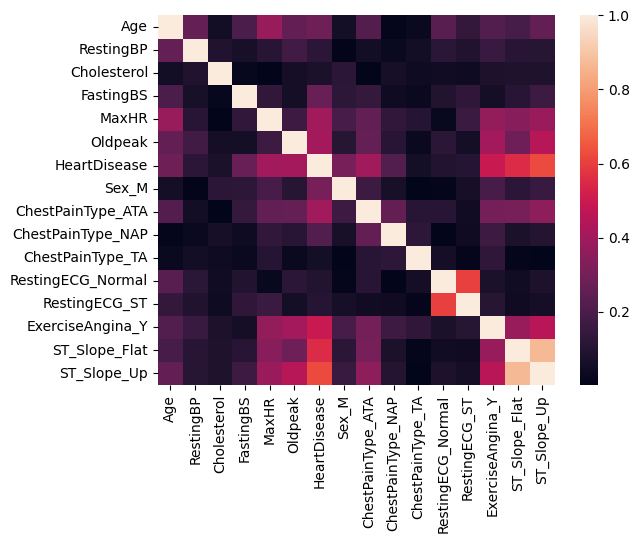

In [19]:
import seaborn as sns
correlation = abs(heart_disease_cleaned.corr(method = 'pearson'))
sns.heatmap(correlation)

In [20]:
correlation['HeartDisease'].sort_values(ascending = False)

HeartDisease         1.000000
ST_Slope_Up          0.621843
ST_Slope_Flat        0.553700
ExerciseAngina_Y     0.495490
Oldpeak              0.403638
ChestPainType_ATA    0.401680
MaxHR                0.401410
Sex_M                0.305118
Age                  0.282012
FastingBS            0.267994
ChestPainType_NAP    0.215311
RestingBP            0.117990
RestingECG_ST        0.103067
RestingECG_Normal    0.092452
Cholesterol          0.072171
ChestPainType_TA     0.054591
Name: HeartDisease, dtype: float64

In [21]:
# select features
features = correlation['HeartDisease'].sort_values(ascending = False).index[1:5].tolist()
features.append('Sex_M')
print(features)

['ST_Slope_Up', 'ST_Slope_Flat', 'ExerciseAngina_Y', 'Oldpeak', 'Sex_M']


In [22]:
from sklearn.model_selection import train_test_split
X = heart_disease_cleaned.drop('HeartDisease', axis = 1)
y = heart_disease_cleaned['HeartDisease']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size= 0.20, random_state= 300)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size= 0.25, random_state=300)


In [23]:
heart_disease_cleaned.isna().sum()

Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_M                0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_Y     0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64

In [24]:
from sklearn.neighbors import KNeighborsClassifier
for feature in features:
    knn = KNeighborsClassifier(n_neighbors= 5)
    knn.fit(X_train[[feature]], y_train)
    accuracy = knn.score(X_val[[feature]], y_val)
    print("The accuracy of the model for feature {0} is {1}%.".format(feature, round(accuracy*100, 2)))

The accuracy of the model for feature ST_Slope_Up is 84.78%.
The accuracy of the model for feature ST_Slope_Flat is 82.61%.
The accuracy of the model for feature ExerciseAngina_Y is 78.8%.
The accuracy of the model for feature Oldpeak is 77.72%.
The accuracy of the model for feature Sex_M is 61.96%.


## Feature scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[features])

In [26]:
X_val_scaled = scaler.transform(X_val[features])

In [27]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
accuracy_scaled = knn.score(X_val_scaled, y_val)
print("The accuracy of the model after scaling with the 5 features is {}%.".format(round(accuracy_scaled*100, 2)))

The accuracy of the model after scaling with the 5 features is 85.33%.


The overall performance is much better than the average of the unscaled single-feature KNN model. 85% is very satisfying.

## Hyperparameter Tuning

In [28]:
from sklearn.model_selection import GridSearchCV
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size= 0.20, random_state= 300)
scaler = MinMaxScaler()
X_trainval_scaled = scaler.fit_transform(X_trainval[features])
knn = KNeighborsClassifier()
grid_params = {'n_neighbors': range (1, 11), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']}
knn_grid = GridSearchCV(knn, grid_params, scoring= 'accuracy')
knn_grid.fit(X_trainval_scaled, y_trainval)
# Always use the data after scaling!
best_score = knn_grid.best_score_
best_param = knn_grid.best_params_
print("The best score, {0}, is achieved by parameters: {1}!".format(best_score, best_param))


The best score, 0.8199142670766937, is achieved by parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}!



## Evaluation on test set

In [29]:
X_test_scaled = scaler.transform(X_test[features])
accuracy_test = knn_grid.best_estimator_.score(X_test_scaled, y_test)
print("The accuracy of the model with best parameters is {}%.".format(round(accuracy_test*100, 2)))

The accuracy of the model with best parameters is 87.5%.


1) Potential improvements can be done by researching other features (but incorporating too many risks overfitting), use other data management strategies such as over or undersampling, not only one-hot coding, or use models that are not knn.

2) The pros of the model include easy to make and high accuracy. But it can be costly facing a larger dataset and KNN is very sensitive to noise.